In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score


In [77]:
url = 'ai4i2020.csv'
df = pd.read_csv(url)

In [78]:
print(df.head())

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


In [79]:
# Normalize numerical features
scaler = StandardScaler()
numerical_features = ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']
df[numerical_features] = scaler.fit_transform(df[numerical_features])

# Encode categorical variables (if any)
# Example: df['column'] = df['column'].astype('category').cat.codes

# Check the processed data
print(df.head())

   UID Product ID Type  Air temperature [K]  Process temperature [K]  \
0    1     M14860    M            -0.952389                -0.947360   
1    2     L47181    L            -0.902393                -0.879959   
2    3     L47182    L            -0.952389                -1.014761   
3    4     L47183    L            -0.902393                -0.947360   
4    5     L47184    L            -0.902393                -0.879959   

   Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Machine failure  TWF  \
0                0.068185     0.282200        -1.695984                0    0   
1               -0.729472     0.633308        -1.648852                0    0   
2               -0.227450     0.944290        -1.617430                0    0   
3               -0.590021    -0.048845        -1.586009                0    0   
4               -0.729472     0.001313        -1.554588                0    0   

   HDF  PWF  OSF  RNF  
0    0    0    0    0  
1    0    0    0    0  
2    0  

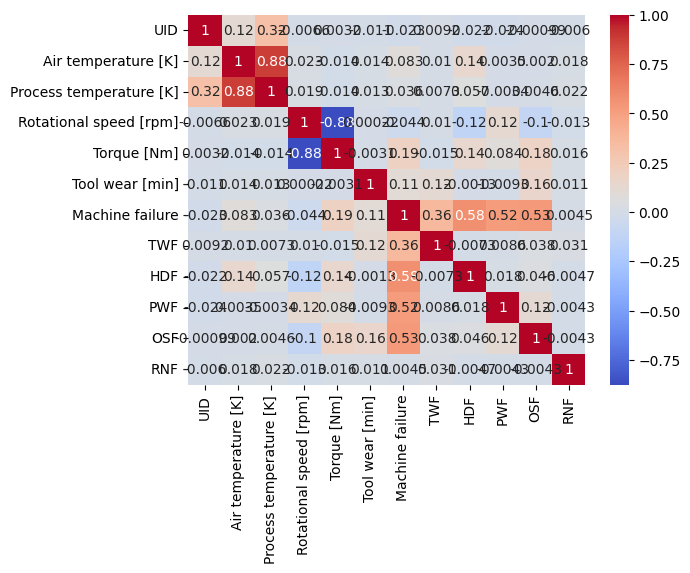

In [80]:
# Exclude non-numeric columns
numeric_df = df.select_dtypes(include=[float, int])

# Compute correlation matrix
corr_matrix = numeric_df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

In [81]:
non_numeric_columns = df.select_dtypes(exclude=[float, int]).columns
print("Non-numeric columns:", non_numeric_columns)
# Example: Encoding non-numeric columns (assuming they are categorical)
df_encoded = df.copy()
for column in non_numeric_columns:
    df_encoded[column] = df_encoded[column].astype('category').cat.codes

# Define features and target again with the encoded DataFrame
X = df_encoded.drop(columns=[target_column])
y = df_encoded[target_column]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))

Non-numeric columns: Index(['Product ID', 'Type'], dtype='object')
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1939
           1       1.00      0.97      0.98        61

    accuracy                           1.00      2000
   macro avg       1.00      0.98      0.99      2000
weighted avg       1.00      1.00      1.00      2000



In [82]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Accuracy: 0.999
Precision: 1.0
Recall: 0.9672131147540983
F1 Score: 0.9833333333333333


In [83]:
#Define the parameter grid without 'auto'
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['sqrt', 'log2'],
    'max_depth': [4, 6, 8, 10, 12],
    'criterion': ['gini', 'entropy']
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the model
grid_search.fit(X_train, y_train)

# Print the best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Best Parameters: {'criterion': 'gini', 'max_depth': 6, 'max_features': 'sqrt', 'n_estimators': 100}
Best Score: 0.999125


In [84]:
# Train the optimized model
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

# Make predictions
y_pred_optimized = best_model.predict(X_test)

# Evaluate the optimized model
print(classification_report(y_test, y_pred_optimized))

accuracy_opt = accuracy_score(y_test, y_pred_optimized)
precision_opt = precision_score(y_test, y_pred_optimized)
recall_opt = recall_score(y_test, y_pred_optimized)
f1_opt = f1_score(y_test, y_pred_optimized)

print(f"Optimized Accuracy: {accuracy_opt}")
print(f"Optimized Precision: {precision_opt}")
print(f"Optimized Recall: {recall_opt}")
print(f"Optimized F1 Score: {f1_opt}")

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1939
           1       1.00      0.97      0.98        61

    accuracy                           1.00      2000
   macro avg       1.00      0.98      0.99      2000
weighted avg       1.00      1.00      1.00      2000

Optimized Accuracy: 0.999
Optimized Precision: 1.0
Optimized Recall: 0.9672131147540983
Optimized F1 Score: 0.9833333333333333


In [85]:
# Cross-validation
cv_scores = cross_val_score(best_model, X, y, cv=5, scoring='accuracy')
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean CV Score: {cv_scores.mean()}")

Cross-Validation Scores: [0.9995 0.999  0.6475 0.998  0.999 ]
Mean CV Score: 0.9286
